# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+2$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [ ]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0

#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [38]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [75]:
def is_shattered(S, plot: bool = True, kernel="linear"):
    
    N, d = S.shape
    result = True

    if plot and d != 2:
        raise AttributeError

    for n in range(N):
        for positive in combinations(range(N), n):
            if len(positive) == 0:
                continue

            positive = list(positive)
            y = np.zeros(N)
            y[positive] = 1

            mod = SVC(C=1000, shrinking=False, kernel=kernel, tol=1e-5)
            mod.fit(S, y)
            preds = mod.predict(S)

            curr_result = True
            if not np.array_equal(preds, y):    
                result = False
                curr_result = False

            if plot:
                p = sns.scatterplot(x=S[:, 0], y=S[:, 1], hue=y)
                p.set(title=f"Classes are {'' if curr_result else 'not '}lineary separable")
                plt.show()


    return result

### c)

In [76]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

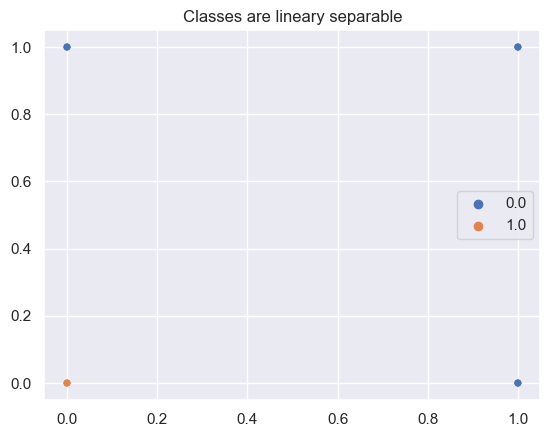

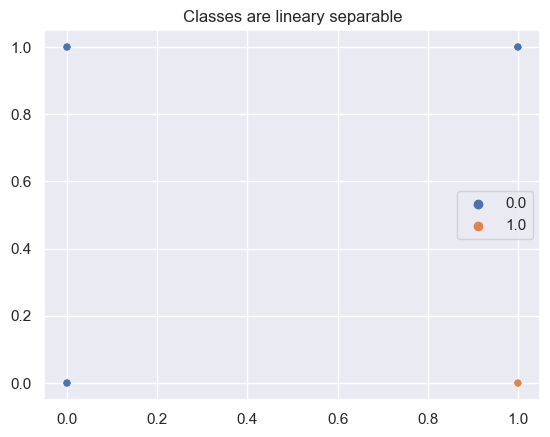

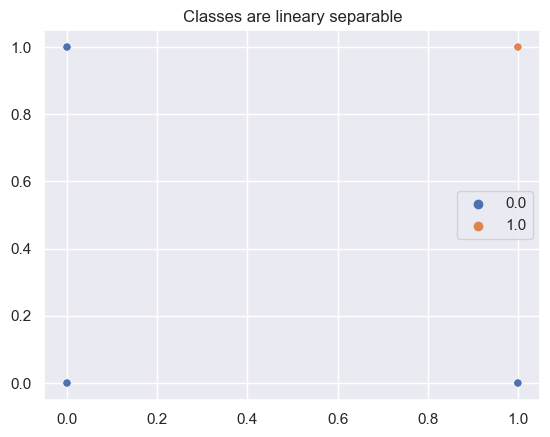

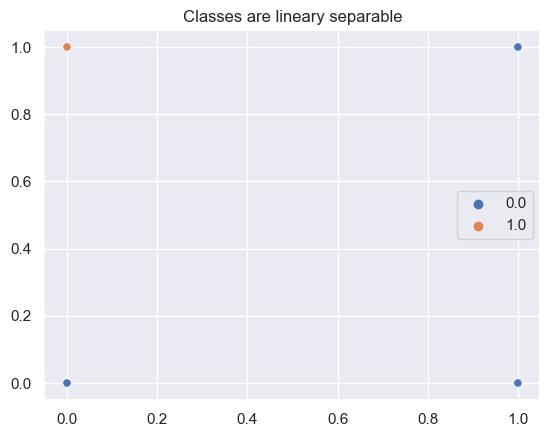

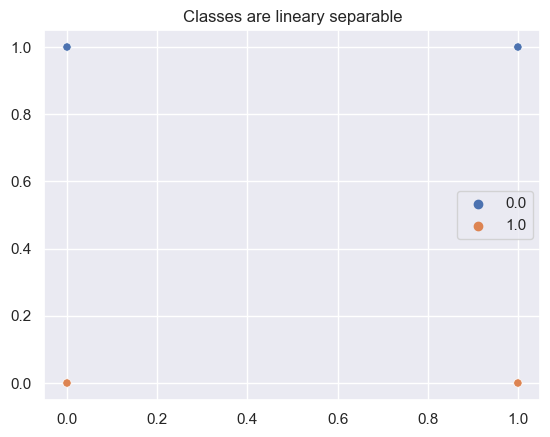

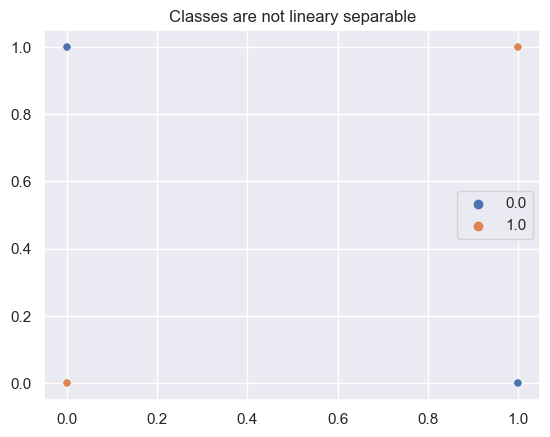

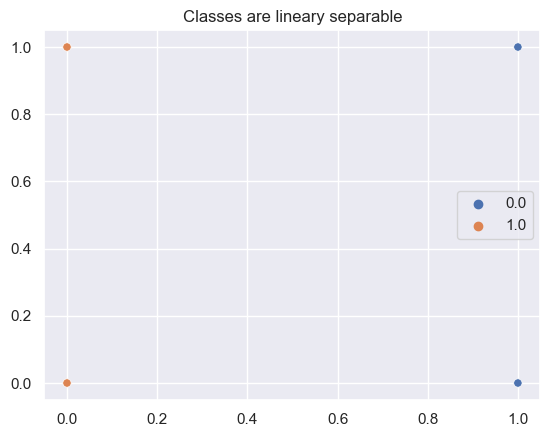

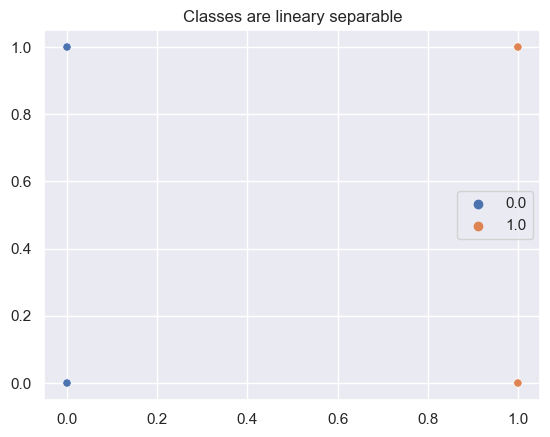

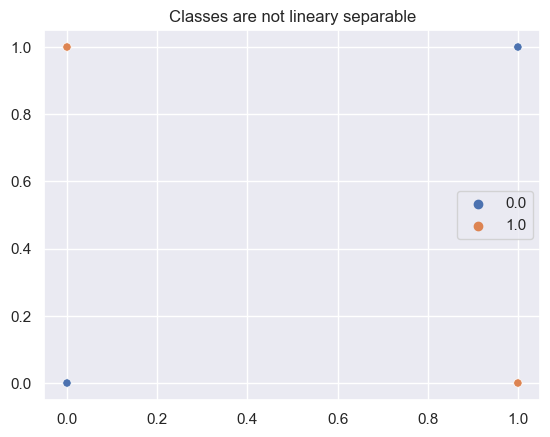

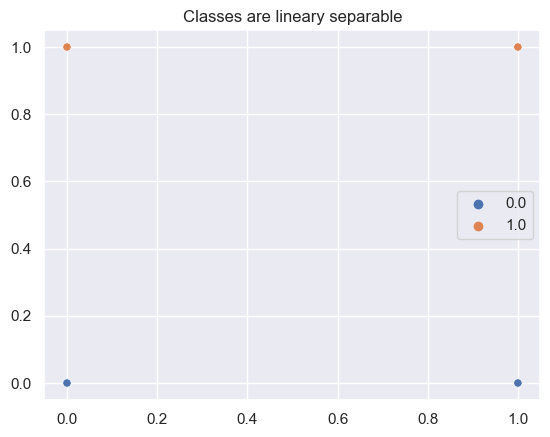

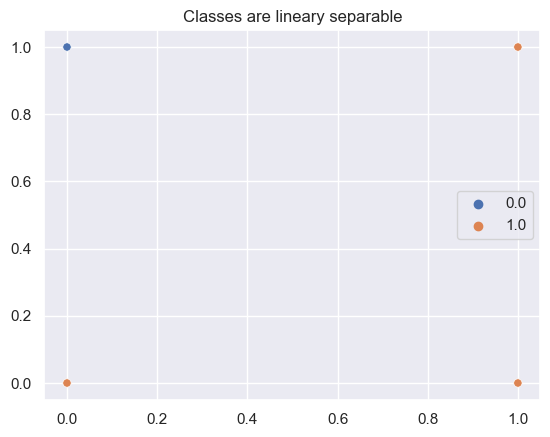

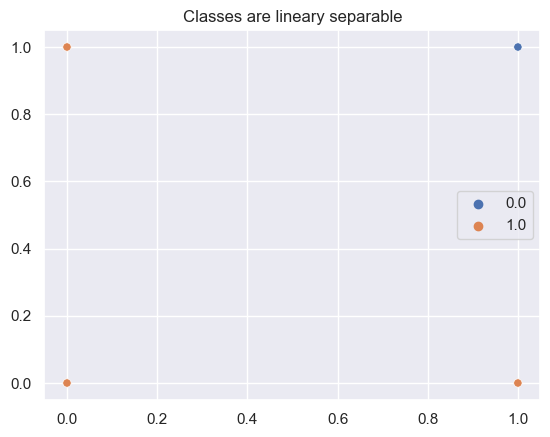

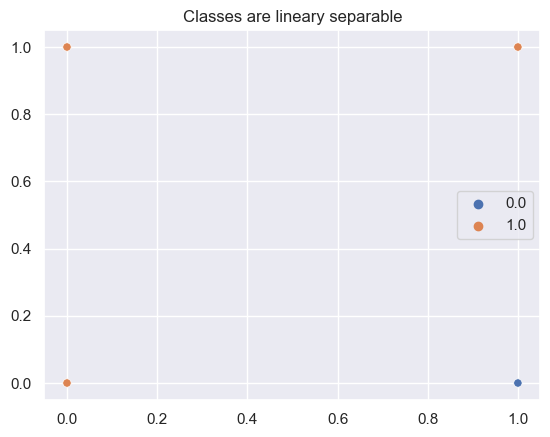

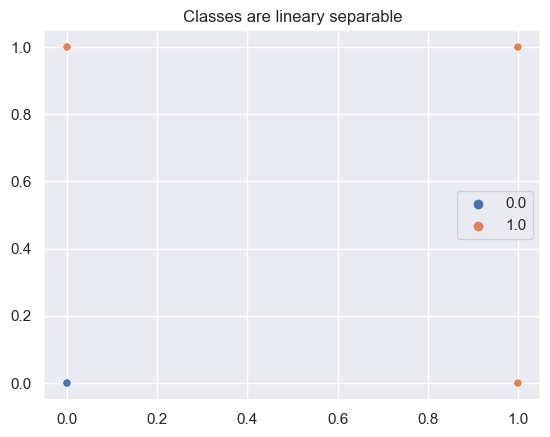

False

In [77]:
S = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
is_shattered(S)

### d)

In [62]:
# code
D = list(range(2, 11))
rng = np.random.default_rng()
N = 50

In [64]:
results = []
for d in D:
    n = 2
    while True:
        for _ in range(N):
            S = rng.normal(size=(n, d))
            shatterd = is_shattered(S, plot=False)
            if shatterd:
                break

        if not shatterd:
            break
        n += 1
        
    res = {"d": d, "VCdim": n}
    print(res)
    results.append(res)

{'d': 2, 'VCdim': 4}
{'d': 3, 'VCdim': 5}
{'d': 4, 'VCdim': 6}
{'d': 5, 'VCdim': 7}
{'d': 6, 'VCdim': 8}
{'d': 7, 'VCdim': 9}
{'d': 8, 'VCdim': 10}
{'d': 9, 'VCdim': 11}
{'d': 10, 'VCdim': 12}


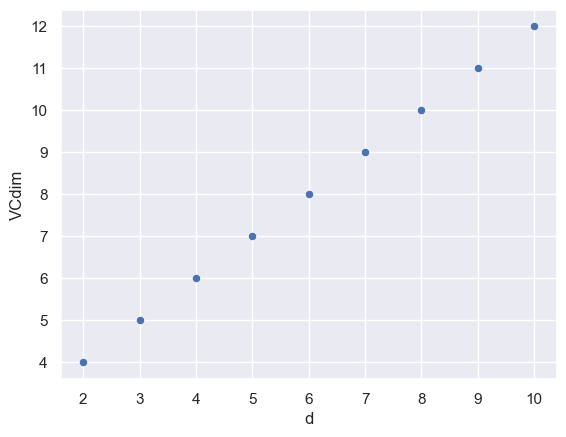

In [65]:
import pandas as pd

results_df = pd.DataFrame.from_records(results)
sns.scatterplot(data=results_df, x="d", y="VCdim")
plt.show()

Estimates agree with the fact from the lecture, that is: if $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+2$.

### e)

In [78]:
# A hint: change a kernel in SVM
# results = []
# for d in D:
#     n = 2
#     while True:
#         for _ in range(N):
#             S = rng.normal(size=(n, d))
#             shatterd = is_shattered(S, plot=False, kernel="rbf")
#             if shatterd:
#                 break

#         if not shatterd:
#             break
#         n += 1
        
#     res = {"d": d, "VCdim": n}
#     print(res)
#     results.append(res)

KeyboardInterrupt: 